In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
np.set_printoptions(precision=6) # Printa apenas 6 casas decimais para arrays

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # Como é considerado dado novo apenas transform, evita fazamento de dados
print(X_train[:10])
print()
print(X_test[:10])

[[ 1.92295   2.146016]
 [ 2.020161  0.378719]
 [-1.382215 -0.432499]
 [-1.187794 -1.01194 ]
 [ 1.92295  -0.925024]
 [ 0.367578  0.291803]
 [ 0.173157  0.146943]
 [ 2.020161  1.740407]
 [ 0.756421 -0.838108]
 [ 0.270367 -0.287638]]

[[-0.798951  0.494608]
 [-0.021265 -0.577359]
 [-0.312897  0.146943]
 [-0.798951  0.262831]
 [-0.312897 -0.577359]
 [-1.090583 -1.446521]
 [-0.70174  -1.591382]
 [-0.215686  2.146016]
 [-1.96548  -0.055862]
 [ 0.853632 -0.780164]]


In [5]:
from sklearn.neighbors import KNeighborsClassifier
# Cria e treina um classificador KNN com 5 vizinhos, usando a distância de Minkowski (equivalente à Euclidiana)
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2).fit(X_train, y_train)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

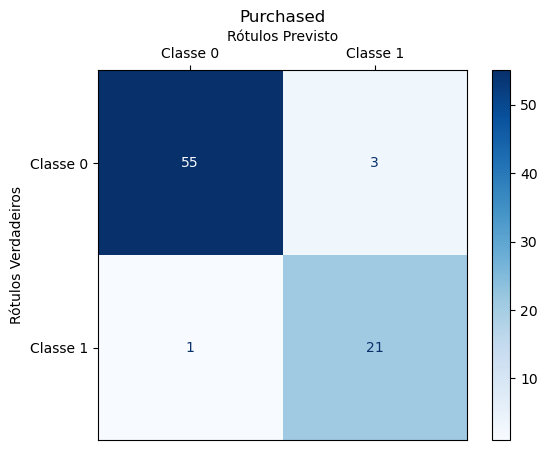

Acurácia: 95.00%


In [8]:
# Exibir a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Classe 0', 'Classe 1']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Purchased")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac:.2%}")

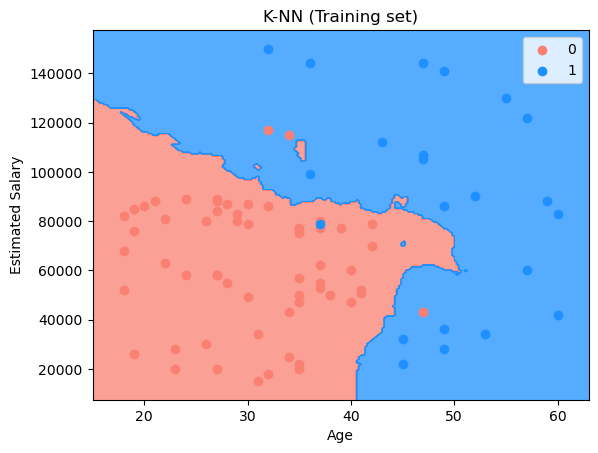

In [9]:
from matplotlib.colors import ListedColormap
h = .02
X0_min, X0_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
X1_min, X1_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
X0, X1 = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
X0_unscaled, X1_unscaled = sc.inverse_transform(np.c_[X0.ravel(), X1.ravel()]).T.reshape(2, X0.shape[0], X0.shape[1])
colormap = ListedColormap(('salmon', 'dodgerblue'))
plt.contourf(X0_unscaled, X1_unscaled, classifier.predict(np.c_[X0.ravel(), X1.ravel()]).reshape(X0.shape),
             alpha=0.75, cmap=colormap)
X_set, y_set = sc.inverse_transform(X_test), y_test
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colormap(i), label=j)
xLower, xUpper = min(X_set[:, 0]), max(X_set[:, 0])
yLower, yUpper = min(X_set[:, 1]), max(X_set[:, 1])
xMargin, yMargin = xUpper * 0.05, yUpper * 0.05
plt.xlim(xLower - xMargin, xUpper + xMargin)
plt.ylim(yLower - yMargin, yUpper + yMargin)
plt.title("K-NN (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()